In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-place/student_clustering.csv


In [3]:
df=pd.read_csv("/kaggle/input/student-place/student_clustering.csv")

In [4]:
df.shape

(200, 2)

In [5]:
df.sample(5)

,cgpa,iq
14,5.71,108
145,8.58,118
176,8.94,115
117,5.74,108
27,9.18,119


In [6]:
import matplotlib.pyplot as plt

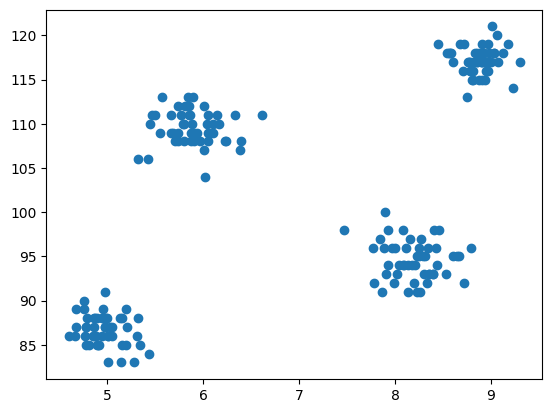

In [7]:
plt.scatter(df['cgpa'],df['iq'])

In [11]:
#drawing elbow graph to chk which no of clusters are good
wcss=[]
from sklearn.cluster import KMeans
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
    

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

In [12]:
wcss

[29957.898288,
 4184.14127,
 2362.7133489999997,
 681.96966,
 523.7131894763966,
 388.8524026875981,
 295.4391895943192,
 234.4868734319922,
 214.21566972383255,
 175.51731515251822]

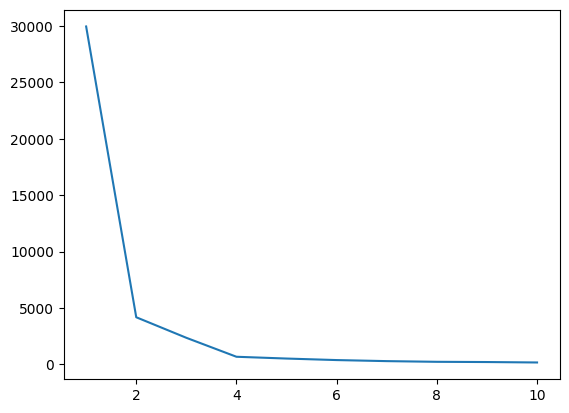

In [15]:
# plotting elbow curve
plt.plot(range(1,11),wcss)

In [20]:
#hence from elbow graph it can be easily seen that 4 clusters are best
x=df[['iq','cgpa']].values

In [21]:
x

array([[ 88.  ,   5.13],
       [113.  ,   5.9 ],
       [ 93.  ,   8.36],
       [ 97.  ,   8.27],
       [110.  ,   5.45],
       [109.  ,   5.88],
       [ 98.  ,   8.41],
       [115.  ,   8.8 ],
       [110.  ,   5.79],
       [ 94.  ,   8.09],
       [ 86.  ,   4.6 ],
       [110.  ,   6.1 ],
       [ 97.  ,   8.16],
       [ 88.  ,   5.  ],
       [108.  ,   5.71],
       [ 95.  ,   8.31],
       [111.  ,   5.5 ],
       [ 91.  ,   7.87],
       [111.  ,   6.05],
       [113.  ,   5.84],
       [ 98.  ,   7.47],
       [ 86.  ,   4.86],
       [ 92.  ,   7.78],
       [ 87.  ,   4.78],
       [ 88.  ,   4.96],
       [ 98.  ,   7.93],
       [ 87.  ,   4.86],
       [119.  ,   9.18],
       [ 94.  ,   8.04],
       [106.  ,   5.43],
       [117.  ,   8.86],
       [112.  ,   6.01],
       [118.  ,   8.83],
       [106.  ,   5.32],
       [ 96.  ,   7.77],
       [ 96.  ,   8.  ],
       [118.  ,   8.56],
       [108.  ,   5.91],
       [ 84.  ,   5.44],
       [113.  ,   5.57],


In [26]:
type(x)

numpy.ndarray

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()

In [31]:
x_scaled=sc.fit_transform(x)

In [32]:
kmeans=KMeans(n_clusters=4,random_state=42)

In [33]:
#labels le lete h ab
#as till here its unsupervised learning
lables=kmeans.fit_predict(x_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
df['cluster']=lables

In [37]:
df.sample(20)

,cgpa,iq,cluster
161,8.97,119,1
82,5.47,111,2
100,5.88,110,2
52,8.79,116,1
189,6.33,111,2
56,5.85,111,2
69,8.29,95,3
123,8.72,119,1
119,4.98,87,0
179,8.91,115,1


In [38]:
print(kmeans.cluster_centers_)

[[-1.26080305 -1.24429338]
 [ 1.25008684  1.16540625]
 [ 0.62030356 -0.6719604 ]
 [-0.60958735  0.75084754]]


Text(0, 0.5, 'iq (scaled)')

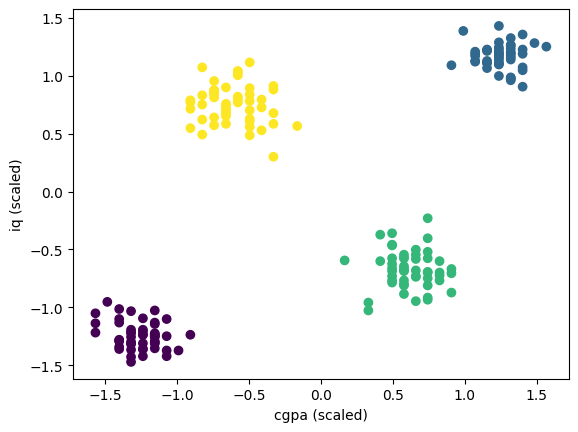

In [44]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=lables)
plt.xlabel('cgpa (scaled)')
plt.ylabel('iq (scaled)')
